In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

In [3]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
x=df[['enginesize','horsepower','citympg','highwaympg']]
y=df['price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
df = df.dropna()

In [7]:
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [8]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
SS = StandardScaler()

x_trained = SS.fit_transform(X_train)
x_test = SS.fit_transform(X_test)

In [10]:
model = LinearRegression()
model.fit(x_trained, y_train)

LinearRegression()

In [11]:
y_pred=model.predict(x_test)

In [12]:
print("-"*50)
print("MODEL COEFFICIENTS:")
for feature, coef in zip(x.columns, model.coef_):
    print(f"(feature:>12): (coef:>10.2f)")
print(f"('Intercept':>12): (model.intercept_:>10.2f)")

--------------------------------------------------
MODEL COEFFICIENTS:
(feature:>12): (coef:>10.2f)
(feature:>12): (coef:>10.2f)
(feature:>12): (coef:>10.2f)
(feature:>12): (coef:>10.2f)
('Intercept':>12): (model.intercept_:>10.2f)


In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

print("\nMODEL PERFORMANCE:")

print(f"{'MSE':>12}: {mean_squared_error(y_test, y_pred):>10.2f}")
print(f"{'RMSE':>12}: {np.sqrt(mean_squared_error(y_test, y_pred)):>10.2f}")
print(f"{'R-squared':>12}: {r2_score(y_test, y_pred):>10.2f}")

print("=" * 58)



MODEL PERFORMANCE:
         MSE: 17133687.82
        RMSE:    4139.29
   R-squared:       0.78


In [14]:
mse=mean_squared_error(y_test,y_pred)
print('Mean Squared Error=',mse)
rmse=np.sqrt(mse)
print("Root Mean Squared Error=",rmse)
r2score=r2_score(y_test,y_pred)
print('r2 score=',r2score)

Mean Squared Error= 17133687.822608914
Root Mean Squared Error= 4139.285907328572
r2 score= 0.7829640847819556


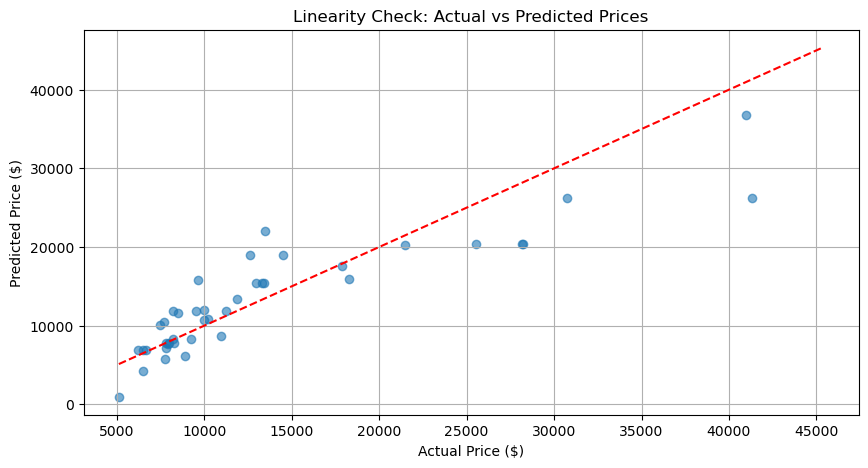

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Linearity Check: Actual vs Predicted Prices")
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.grid(True)
plt.show()


Durbin-Watson Statistic: 2.34 
(Values close to 2 indicate no autocorrelation)


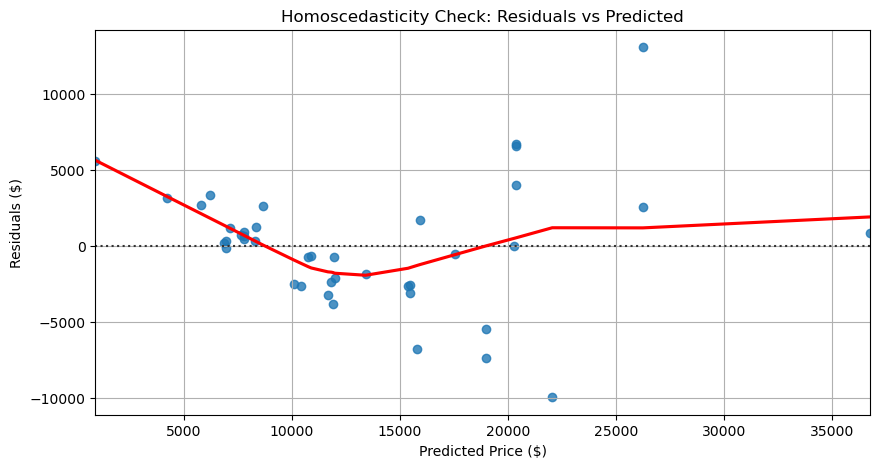

In [20]:
#2.Independence (Durbin-Watson)
import statsmodels.api as sm
residuals = y_test - y_pred
dw_test = sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Watson Statistic: {dw_test:.2f}",
"\n(Values close to 2 indicate no autocorrelation)")

# 3. Homoscedasticity
plt.figure(figsize=(10, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residuals ($)")
plt.grid(True)
plt.show()

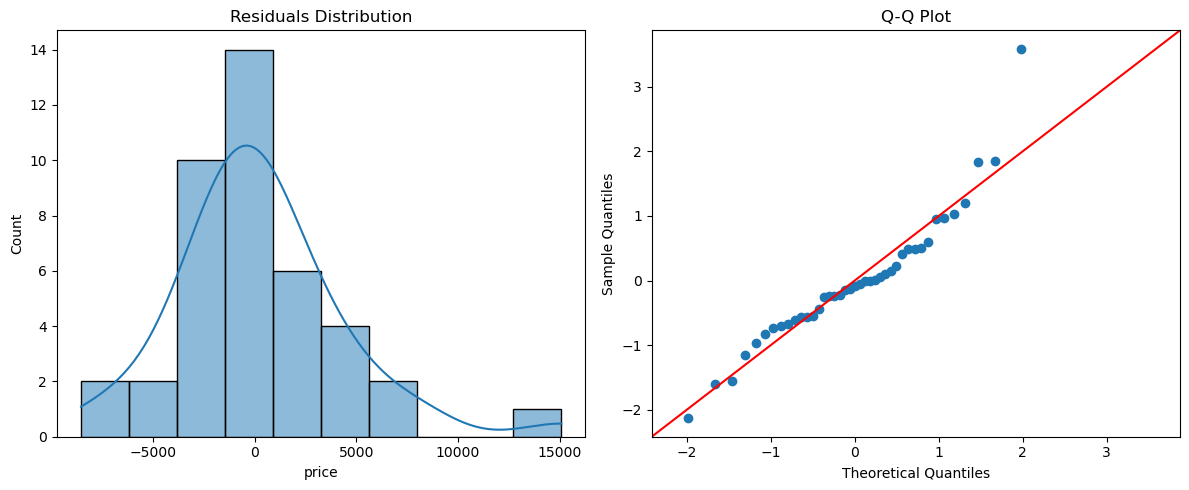

In [21]:
#4. Normality of residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(residuals, kde=True, ax=ax1)
ax1.set_title("Residuals Distribution")
sm.qqplot(residuals, line='45', fit=True, ax=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()